<a href="https://colab.research.google.com/github/Diptanil-Chakraborty/ENVIRONMENT_ENGINEERING/blob/main/AGARTALA_TEMPERATURE_PREDICITIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
weather = pd.read_csv("/content/weather_data_updated.csv", index_col="Date")

In [4]:
# Setup time series for prophet
weather["y"] = weather.shift(-1)["TEMPERATURE"]
weather = weather.ffill()

In [5]:
weather["ds"] = weather.index

In [ ]:
weather.shape

In [7]:
predictors = weather.columns[~weather.columns.isin(["y","ds"])]

In [ ]:
predictors

In [10]:
train = weather[:"31-12-2015"]
test = weather["01-01-2016":]

In [11]:
# Fit initial prophet model
from prophet import Prophet

In [12]:
def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m

In [ ]:
m = fit_prophet(train)

In [ ]:
predictions = m.predict(test)

In [15]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HUMIDITY,HUMIDITY_lower,HUMIDITY_upper,PRECIPITATION,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,25.422861,18.884700,20.977050,25.422861,25.422861,0.006530,0.006530,0.006530,-0.013897,...,0.007081,0.007081,0.007081,-0.202143,-0.202143,-0.202143,0.0,0.0,0.0,19.945150
1,2016-01-02,25.422863,19.238891,21.356426,25.422863,25.422863,0.005357,0.005357,0.005357,-0.013897,...,0.019462,0.019462,0.019462,-0.195847,-0.195847,-0.195847,0.0,0.0,0.0,20.275975
2,2016-01-03,25.422864,24.766502,26.857208,25.422864,25.422864,0.006530,0.006530,0.006530,-0.013897,...,-0.024145,-0.024145,-0.024145,-0.189139,-0.189139,-0.189139,0.0,0.0,0.0,25.846838
3,2016-01-04,25.422865,22.257577,24.241682,25.422865,25.422865,-0.000973,-0.000973,-0.000973,0.046747,...,-0.005226,-0.005226,-0.005226,-0.182169,-0.182169,-0.182169,0.0,0.0,0.0,23.299559
4,2016-01-05,25.422867,28.314908,30.319079,25.422867,25.422867,-0.004025,-0.004025,-0.004025,0.006774,...,0.013656,0.013656,0.013656,-0.175085,-0.175085,-0.175085,0.0,0.0,0.0,29.306420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,2023-12-05,25.426575,30.161996,32.148638,25.419759,25.433553,-0.000552,-0.000552,-0.000552,-0.010182,...,0.013656,0.013656,0.013656,-0.115188,-0.115188,-0.115188,0.0,0.0,0.0,31.205864
2833,2023-12-06,25.426576,28.903110,30.912020,25.419756,25.433559,-0.006040,-0.006040,-0.006040,-0.003394,...,0.017574,0.017574,0.017574,-0.116645,-0.116645,-0.116645,0.0,0.0,0.0,29.893923
2834,2023-12-07,25.426577,27.944113,29.915012,25.419753,25.433566,-0.006598,-0.006598,-0.006598,-0.002305,...,-0.028402,-0.028402,-0.028402,-0.119190,-0.119190,-0.119190,0.0,0.0,0.0,28.906145
2835,2023-12-08,25.426579,26.483801,28.496055,25.419751,25.433572,-0.006882,-0.006882,-0.006882,0.127698,...,0.007081,0.007081,0.007081,-0.122797,-0.122797,-0.122797,0.0,0.0,0.0,27.487104


In [16]:
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

plot_components_plotly(m, predictions)

In [18]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,WINDSPEED,additive,2.733739,0.018177,0.018177,0.018177
1,PRECIPITATION,additive,4.975085,0.002793,0.002793,0.002793
2,HUMIDITY,additive,15.015132,-0.001139,-0.001139,-0.001139
3,TEMPERATURE,additive,25.424091,0.966147,0.966147,0.966147


In [19]:
predictions.index = test.index
predictions["actual"] = test["y"]

In [20]:
def mse(predictions, actual_label="actual", pred_label="yhat"):
    se = ((predictions[actual_label] - predictions[pred_label]) ** 2)
    print(se.mean())

In [21]:
mse(predictions)

12.747359120049529


In [ ]:
# Cross validate across data set
from prophet.diagnostics import cross_validation, performance_metrics
m = fit_prophet(weather)
cv = cross_validation(m, initial=f'{365 * 5} days', period='180 days', horizon = '180 days', parallel="processes")

In [23]:
mse(cv, actual_label="y")

0.6165628252809787


<Axes: >

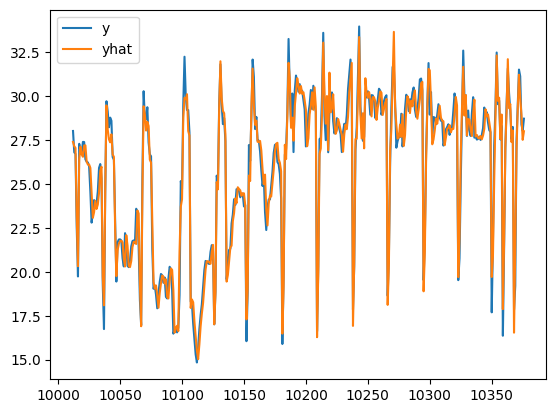

In [24]:
cv[["y", "yhat"]][-365:].plot()

In [25]:
# Predict one day ahead with high accuracy
m = fit_prophet(weather)
m.predict(weather.iloc[-1:])

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptyy9sec5/seb2veq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptyy9sec5/85g5_q4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93334', 'data', 'file=/tmp/tmptyy9sec5/seb2veq3.json', 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HUMIDITY,HUMIDITY_lower,HUMIDITY_upper,PRECIPITATION,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-10,25.419776,26.720578,28.648113,25.419776,25.419776,-0.010749,-0.010749,-0.010749,-0.00208,...,-0.008675,-0.008675,-0.008675,0.051165,0.051165,0.051165,0.0,0.0,0.0,27.652639


In [ ]:
# Predict multiple days ahead with lower accuracy
m = Prophet()
m.fit(weather)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [27]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)